In [71]:
"""Notebook for applying PCA to dense array map"""

%matplotlib inline

import os
import numpy as np
import pandas as pd
import seaborn.apionly as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.decomposition import PCA

In [47]:
# instantiate machine
machine = PCA()

# read files
stem = os.getcwd()
chi_list = [f for f in os.listdir(stem) if f.endswith('.chi')]
row_num = len(chi_list)

# build data matrix
_chi = np.loadtxt(chi_list[0], skiprows=4)
chi_dim = _chi.shape
col_num = chi_dim[0]

X_mat = np.zeros((row_num, col_num))

fn_list = list(map(lambda x: os.path.join(stem, x), chi_list))
for i in range(len(fn_list)):
    _chi = np.loadtxt(fn_list[i], skiprows=4)
    X_mat[i,] = _chi[:,1]

print("expected_row_num = {}, expected_col_num = {}, X_mat.shape = {}"
      .format(row_num, col_num, X_mat.shape))

expected_row_num = 136, expected_col_num = 1476, X_mat.shape = (136, 1476)


In [60]:
# fit PCA
X_mean = np.mean(X_mat, axis=0)
X = X_mat - X_mean
machine.fit(X)

PCA(copy=True, n_components=None, whiten=False)

In [68]:
# define reconstruction function
def PCA_reconstruc(X, num_PC):
    """function to reconstruct data set based on Principle Component analysis
    
    Parameters
    ----------
    X : array-like
        raw input of data, expected shape (num_of_data, num_of_feature)
    num_PC : int
        number PC want to include
    
    Returns
    -------
    res : array-like
        reconstructed X_mat with num_PC used. expected shape is (num_of_data, num_of_feature)
    """
    machine = PCA()
    mean = X.mean(axis=0)
    #print("X_mean = {}".format(mean))
    _X = X - mean
    X_dim = _X.shape
    machine.fit(_X)
    eigen_mat = machine.components_ # N x P matrix, where P is # of features
    project_mat = np.dot(eigen_mat[:num_PC, :].T, eigen_mat[:num_PC, :])
    print("shape of project matrix = {}, expect to be {}x{}"
          .format(project_mat.shape, X_dim[1], X_dim[1])
         )
    X_hat = np.dot(_X, project_mat)
    X_hat += mean
    print("shape of reconstruction = {}".format(X_hat.shape))
    
    return X_hat

def calRw(g0, g1):
    sum_sqr_diff = np.sum(np.square(np.abs(g0-g1)))
    sum_sqr_g0 = np.sum(np.square(g0))
    ratio = np.divide(sum_sqr_diff, sum_sqr_g0)
    print(ratio)
    #ratio[ratio == np.inf] = 0
    return np.sqrt(ratio)

Accumulated Explaiend Ratio by top-5 features: [ 0.7744793   0.88608081  0.95599517  0.96576443  0.97237785]


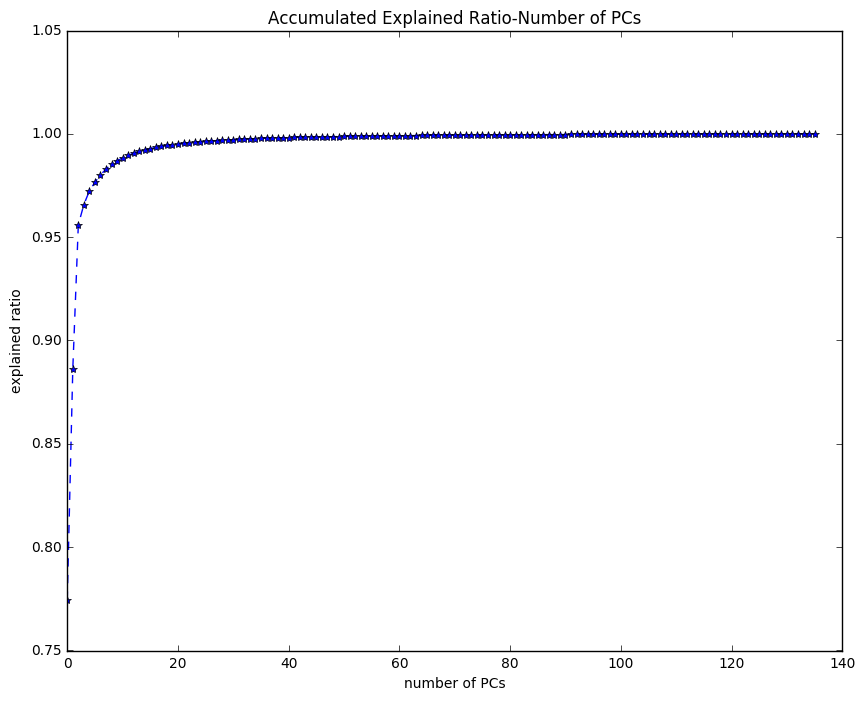

In [10]:
# explained ratio
print("Accumulated Explaiend Ratio by top-5 features: {}"
      .format(np.cumsum(machine.explained_variance_ratio_[:5])))
f1, ax1 = plt.subplots(1, figsize=(10,8))
ax1.plot(np.cumsum(machine.explained_variance_ratio_), 'b--*')
ax1.set_xlabel('number of PCs')
ax1.set_ylabel('explained ratio')
ax1.set_title('Accumulated Explained Ratio-Number of PCs')
plt.show()

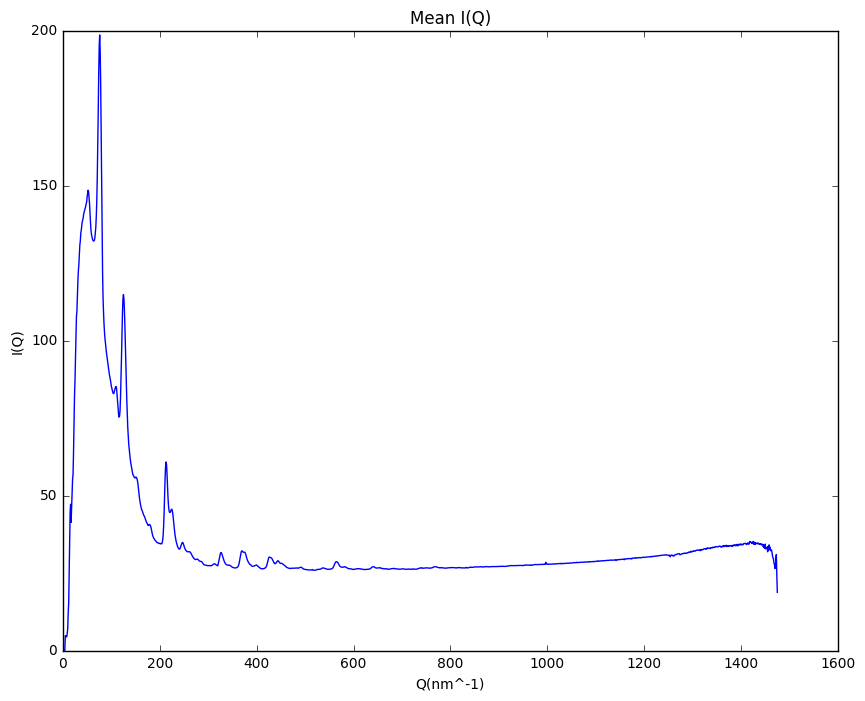

In [11]:
# plot I(Q)
f2, ax2 = plt.subplots(1, figsize=(10,8))
x_ax = _chi[:,0]
ax2.plot(X_mean)
ax2.set_xlabel('Q(nm^-1)')
ax2.set_ylabel('I(Q)')
ax2.set_title('Mean I(Q)')
plt.show()

5.12546442024e-05
filename = Catalyst_Array_DenseMap_075785_0115.chi
index = 115
filename = Catalyst_Array_DenseMap_075785_0035.chi
index = 131
Pb/Cu
0.00084920612689
Pt/Cu
0.000243146186557


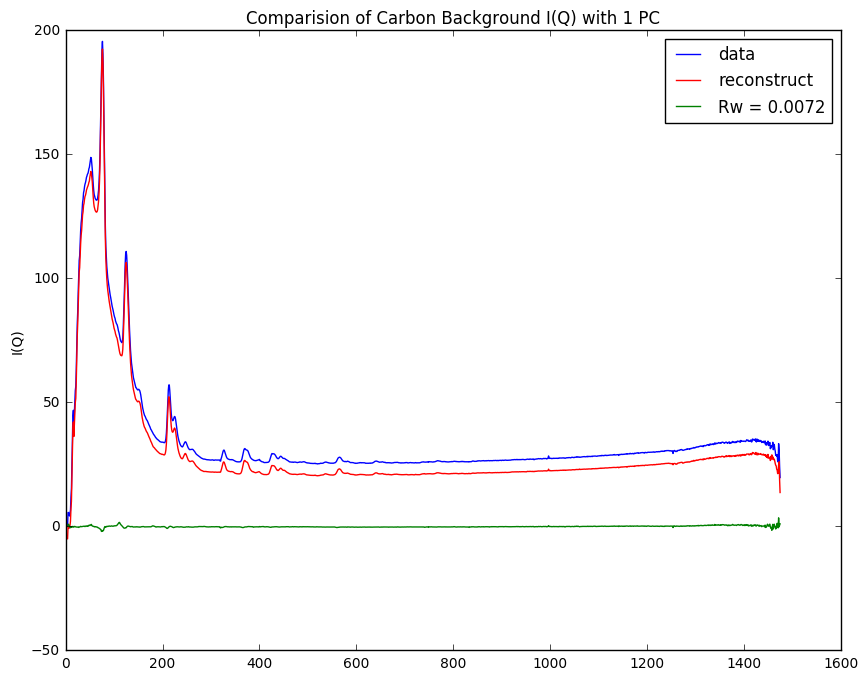

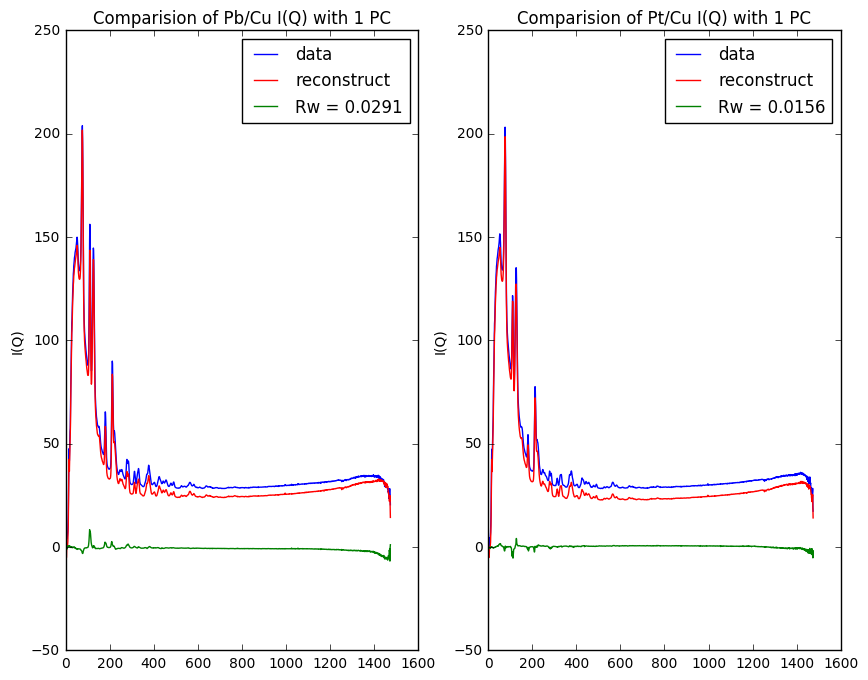

In [12]:
nComp = 1
Xhat = np.dot(machine.transform(X)[:,:nComp], machine.components_[:nComp,:])
Xhat += X_mean
diff_df = pd.DataFrame(X_mat - Xhat)
f3, ax3 = plt.subplots(1, figsize=(10,8))
x_ax = _chi[:,0]
g0 = X_mat[0,:]
g1 = Xhat[0,:]
ax3.plot(g0, 'b-')
ax3.plot(g1-5, 'r-')
ax3.plot(g0-g1, 'g-')
Rw = calRw(g0, g1)
ax3.legend(['data', 'reconstruct', 'Rw = {:0.4f}'.format(Rw)])
ax3.set_ylabel('I(Q)')
ax3.set_title('Comparision of Carbon Background I(Q) with {} PC'.format(nComp))

# sorting index
fn_1 = [f for f in chi_list if f.split('_')[-1].startswith('0115')].pop()
print("filename = {}\nindex = {}".format(fn_1, chi_list.index(fn_1)))

fn_2 = [f for f in chi_list if f.split('_')[-1].startswith('0035')].pop()
print("filename = {}\nindex = {}".format(fn_2, chi_list.index(fn_2)))
ind_list = [chi_list.index(fn_1), chi_list.index(fn_2)]

# plot reconstruction with 1 PC
f4, ax4 = plt.subplots(1,2, figsize=(10,8))
x_ax = _chi[:,0]
for i in range(len(ind_list)):
    ind = ind_list[i]
    if ind == 115:
        compound = 'Pb/Cu'
    else:
        compound = 'Pt/Cu'
    print(compound)
    g0 = X_mat[ind,:]
    g1 = Xhat[ind,:]
    ax4[i].plot(g0, 'b-')
    ax4[i].plot(g1-5, 'r-')
    ax4[i].plot(g0-g1, 'g-')
    Rw = calRw(g0, g1)
    ax4[i].legend(['data', 'reconstruct', 'Rw = {:0.4f}'.format(Rw)])
    ax4[i].set_ylabel('I(Q)')
    ax4[i].set_title('Comparision of {} I(Q) with {} PC'.format(compound, nComp))

In [13]:
aa = Xhat[0,:]
x_ax.shape
qq = np.vstack((x_ax, aa))
qq.T.shape == chi_dim
np.savetxt('PCA_background.txt', qq.T)

8.11041047804e-05
0.000239571784741
0.000828479375852
0.000105096219919


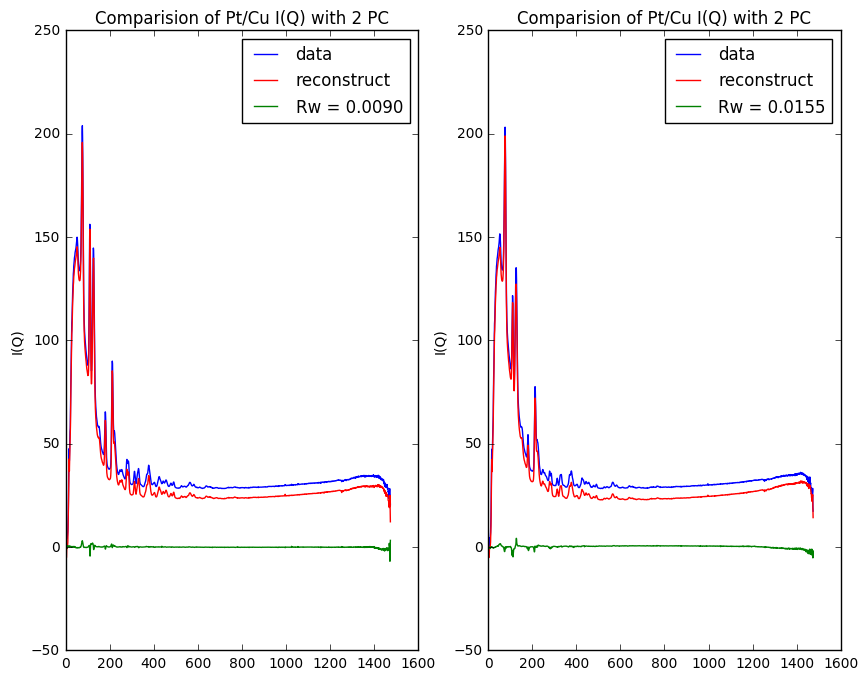

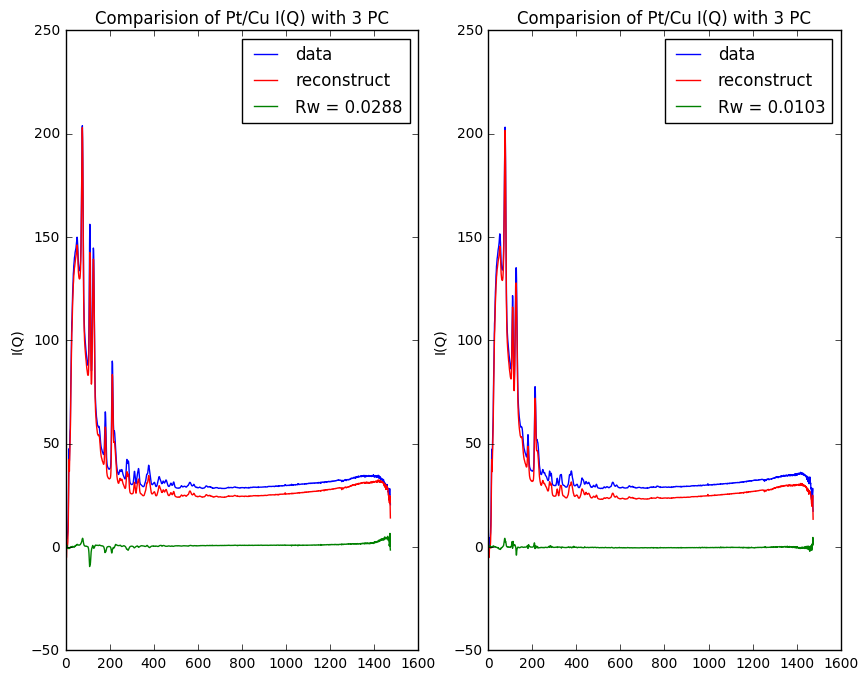

In [14]:
nComp = 2
Xhat = np.dot(machine.transform(X)[:,:nComp], machine.components_[:nComp,:])
Xhat += X_mean
#diff_df3 = pd.DataFrame(X_mat - Xhat3)
# plot reconstruction with 2 PC
f6, ax6 = plt.subplots(1,2, figsize=(10,8))
x_ax = _chi[:,0]
for i in range(len(ind_list)):
    ind = ind_list[i]
    if ind == '115':
        compound = 'Pb/Cu'
    else:
        compound = 'Pt/Cu'
    g0 = X_mat[ind,:]
    g1 = Xhat[ind,:]
    ax6[i].plot(g0, 'b-')
    ax6[i].plot(g1-5, 'r-')
    ax6[i].plot(g0-g1, 'g-')
    Rw = calRw(g0, g1)
    ax6[i].legend(['data', 'reconstruct', 'Rw = {:0.4f}'.format(Rw)])
    ax6[i].set_ylabel('I(Q)')
    ax6[i].set_title('Comparision of {} I(Q) with {} PC'.format(compound, nComp))
    
nComp = 3
Xhat = np.dot(machine.transform(X)[:, 0:3:2], machine.components_[0:3:2, :])
Xhat += X_mean
#diff_df3 = pd.DataFrame(X_mat - Xhat3)
# plot reconstruction with 1 PC
f7, ax7 = plt.subplots(1,2, figsize=(10,8))
x_ax = _chi[:,0]
for i in range(len(ind_list)):
    ind = ind_list[i]
    if ind == '115':
        compound = 'Pb/Cu'
    else:
        compound = 'Pt/Cu'
    g0 = X_mat[ind,:]
    g1 = Xhat[ind,:]
    ax7[i].plot(g0, 'b-')
    ax7[i].plot(g1-5, 'r-')
    ax7[i].plot(g1-g0, 'g-')
    Rw = calRw(g0, g1)
    ax7[i].legend(['data', 'reconstruct', 'Rw = {:0.4f}'.format(Rw)])
    ax7[i].set_ylabel('I(Q)')
    ax7[i].set_title('Comparision of {} I(Q) with {} PC'.format(compound, nComp))

shape of project matrix = (1476, 1476), expect to be 1476x1476
shape of reconstruction = (136, 1476)


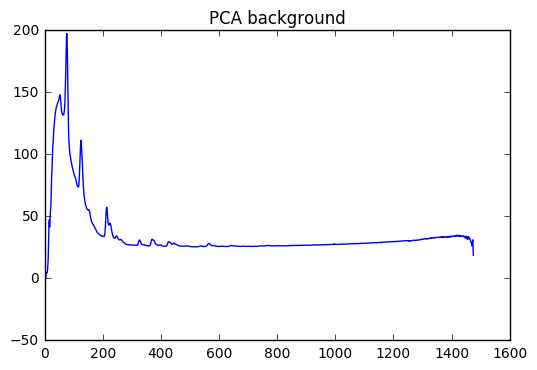

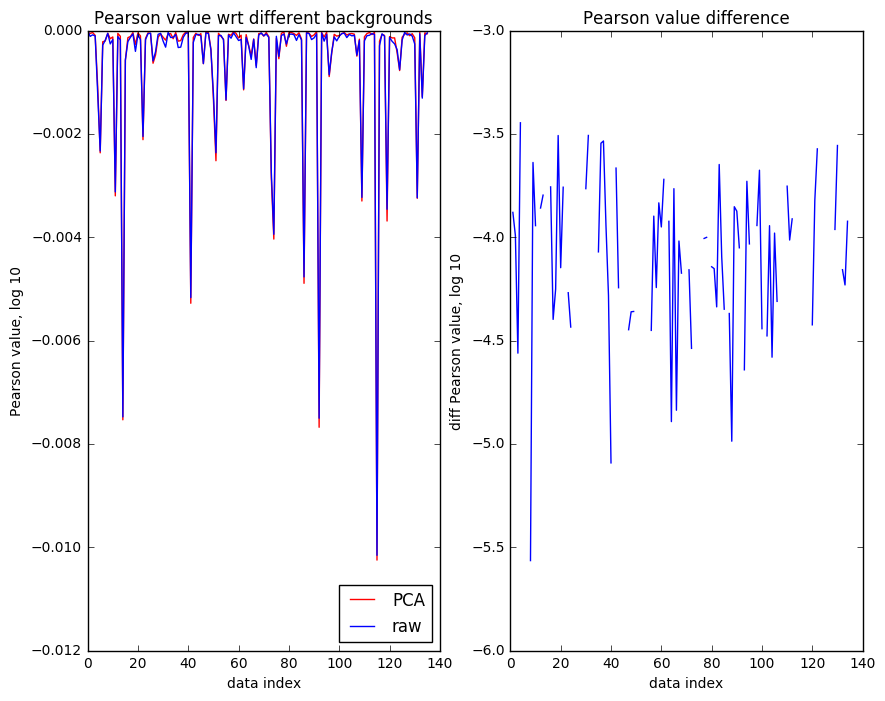

In [126]:
# heat map of Pearson corre
nComp = 1
Xhat = np.dot(machine.transform(X)[:,:nComp], machine.components_[:nComp,:])
Xhat += X_mean
_PCA_bkg = Xhat[0]

onePC_recons = PCA_reconstruc(X_mat, 1)
PCA_bkg = onePC_recons[0]
raw_bkg = X_mat[0]

# plot
f, ax = plt.subplots(1)
ax.plot(PCA_bkg,)
ax.set_title('PCA background')

X_dim = X_mat.shape
pearson_PCA = np.asarray(list(map(lambda x: pearsonr(PCA_bkg, x), X_mat)))
pearson_raw = np.asarray(list(map(lambda x: pearsonr(raw_bkg, x), X_mat)))

f1, ax = plt.subplots(1, 2, figsize=(10,8))
ax[0].plot(np.log10(pearson_PCA[:,0]), 'r-')
ax[0].plot(np.log10(pearson_raw[:,0]), 'b-')
ax[0].legend(['PCA', 'raw'], loc=4)
ax[0].set_title('Pearson value wrt different backgrounds')
ax[0].set_ylabel('Pearson value, log 10')
ax[0].set_xlabel('data index')

ax[1].plot(np.log10(np.subtract(pearson_PCA, pearson_raw)))
ax[1].set_title('Pearson value difference')
ax[1].set_ylabel('diff Pearson value, log 10')
ax[1].set_xlabel('data index')

In [132]:
# does PCA catch compund?
ind = np.where(pearson_PCA[:,0] < np.mean(pearson_PCA[:,0]))
print((ind[0].shape))
ind

(24,)


(array([  4,   5,  11,  14,  22,  26,  41,  46,  50,  51,  55,  62,  67,
         73,  74,  86,  92,  96, 109, 115, 119, 124, 131, 133]),)